In [2]:
import numpy as np
import matplotlib.pyplot as plt 
# 将上面的字典中的所有数组拼接成一个大数组
data_dict_F = {
    'F23_10_T1': np.array([93.66196 , 92.27034 , 92.548096, 96.798195], dtype=np.float32),
    'F16_20_T1': np.array([108.091995, 107.413765, 106.48065 , 105.01907 ], dtype=np.float32),
    'F11_60_T1': np.array([100.37889 ,  99.45668 , 101.252884,  99.575066], dtype=np.float32),
    'F4_63_T1': np.array([57.700672, 58.423424, 58.734547, 58.076767], dtype=np.float32),
    'F3_93_T1': np.array([49.83854 , 49.43337 , 49.550007, 49.315678], dtype=np.float32),
    'F2_78_T1': np.array([43.579926, 43.009945, 43.382626, 43.219566], dtype=np.float32),
    'F2_31_T1': np.array([38.073082, 37.26256 , 37.25082 , 37.32456 ], dtype=np.float32),
    'F1_62_T1': np.array([36.78315 , 36.50363 , 36.49664 , 36.477352], dtype=np.float32)
}

# 合并所有数组为一个大的一维数组
data_dict_F_np = np.concatenate(list(data_dict_F.values())) 

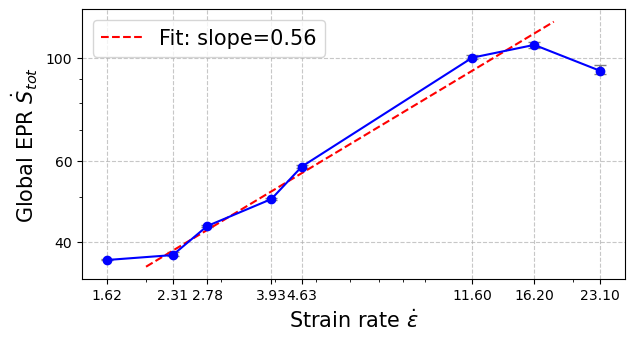

In [9]:
key_order=["F23_10_T1", "F16_20_T1", "F11_60_T1",  "F4_63_T1", "F3_93_T1", "F2_78_T1", "F2_31_T1", "F1_62_T1"
                ] 
ep_array = np.array([data_dict_F[key] for key in key_order])

scale_list=[23.1,16.2, 11.6,4.63, 3.93, 2.78, 2.31, 1.62]

ep_mean = ep_array.mean(axis=1)
max_value = ep_array.max(axis=1)
min_value = ep_array.min(axis=1)
yerr = np.vstack((ep_mean - min_value, max_value - ep_mean))

plt.figure(figsize=(7, 3.5))
# plt.plot(scale_list, ep_mean, marker='o', linestyle='-', color='b', label='Entropy Production Rate')
plt.errorbar(scale_list, ep_mean, yerr=yerr, fmt='o-', color='b', ecolor='gray', elinewidth=2, capsize=4)
#
# 线性拟合
log_scale_list = np.log10(np.array(scale_list[1:-1]))
log_ep_mean = np.log10(ep_mean[1:-1])
coefficients = np.polyfit(log_scale_list, log_ep_mean, 1)
slope, intercept = coefficients
fit_line = 10**(slope * np.log10(np.array([2.,18.])) + intercept)

plt.plot([2.,18.], fit_line, linestyle='--', color='r', label=f'Fit: slope={slope:.2f}') 


plt.xscale('log')
plt.yscale('log')

# 设置横轴刻度标签
plt.xticks(scale_list, [f'{x:.2f}' for x in scale_list], fontsize=10)
plt.yticks([40,60,100], [f'{y:.0f}' for y in [40,60,100]], fontsize=10) 

# 添加标题和标签 
plt.xlabel(r'Strain rate $\dot{\varepsilon}$', fontsize=15)
plt.ylabel(r'Global EPR $\dot{S}_{tot}$', fontsize=15)

# 添加网格和图例
plt.grid(True, linestyle='--', alpha=0.7) 
plt.legend(fontsize=15, loc='upper left')
plt.savefig("Figure/entropy_production_rate_vs_force.svg", dpi=300, bbox_inches='tight')


In [3]:
data_dict_T_1_62 = {'F1_62_T1': np.array([36.78315 , 36.50363 , 36.49664 , 36.477352], dtype=np.float32), 
                    'F1_62_T10': np.array([2759.3936, 2858.9304, 2738.8406, 2918.9314], dtype=np.float32), 
                    'F1_62_T5': np.array([805.4863 , 794.18945, 768.9742 , 754.6266 ], dtype=np.float32), 
                    'F1_62_T2_25': np.array([170.22125, 171.72678, 171.01805, 163.73457], dtype=np.float32), 
                    'F1_62_T0_5': np.array([11.90035 , 11.478205, 11.786741, 11.926412], dtype=np.float32), 
                    'F1_62_T0_25': np.array([5.408261 , 5.3051996, 5.226646 , 5.505894 ], dtype=np.float32)}

data_dict_T_23_10 = {'F23_10_T1': np.array([93.66196 , 92.27034 , 92.548096, 96.798195], dtype=np.float32), 
                     'F23_10_T0_25': np.array([ 31.141968, 935.4849  ,  13.679794,  15.738803], dtype=np.float32), 
                     'F23_10_T0_5': np.array([  21.698565, 1497.9406  ,   31.649033,   59.643543], dtype=np.float32), 
                     'F23_10_T2_25': np.array([380.6058 , 373.7652 , 339.4163 , 419.59827], dtype=np.float32), 
                     'F23_10_T5': np.array([1125.2449, 1144.0336, 1123.7941, 1123.3312], dtype=np.float32), 
                     'F23_10_T10': np.array([ 2846.8628, 16430.166 ,  2842.385 ,  2855.383 ], dtype=np.float32)}



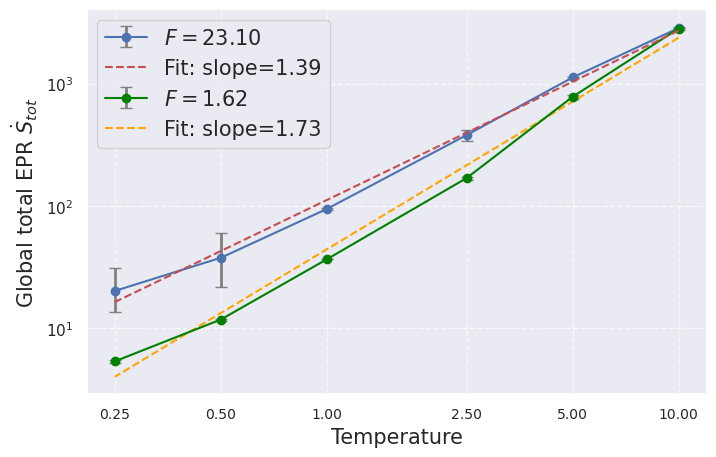

In [4]:

key_order=["F23_10_T10", "F23_10_T5","F23_10_T2_25", "F23_10_T1", "F23_10_T0_5", "F23_10_T0_25"]
ep_array = np.array([data_dict_T_23_10[key] for key in key_order])[:, [0, 2,3]]
ep_key_list = list(data_dict_T_23_10.keys())

scale_list=[10, 5.,2.5,1.,0.5,0.25]

ep_mean = ep_array.mean(axis=1)
max_value = ep_array.max(axis=1)
min_value = ep_array.min(axis=1)
yerr = np.vstack((ep_mean - min_value, max_value - ep_mean))

plt.figure(figsize=(8,5))
# plt.plot(scale_list, ep_mean, marker='o', linestyle='-', color='b', label='Entropy Production Rate')
plt.errorbar(scale_list, ep_mean, yerr=yerr, fmt='o-', color='b', ecolor='gray', elinewidth=2, capsize=4, label=r'$F = 23.10$')
#
# 线性拟合
log_scale_list = np.log10(np.array(scale_list))
log_ep_mean = np.log10(ep_mean)
coefficients = np.polyfit(log_scale_list, log_ep_mean, 1)
slope, intercept = coefficients
fit_line = 10**(slope * np.log10(np.array(scale_list)) + intercept)

plt.plot(scale_list, fit_line, linestyle='--', color='r', label=f'Fit: slope={slope:.2f}', zorder=5) 


#################################################################################################
key_order=["F1_62_T10","F1_62_T5", "F1_62_T2_25", "F1_62_T1", "F1_62_T0_5", "F1_62_T0_25"]
ep_array = np.array([data_dict_T_1_62[key] for key in key_order])
ep_key_list = list(data_dict_T_1_62.keys())

scale_list=[10., 5.,2.5,1.,0.5,0.25]

ep_mean = ep_array.mean(axis=1)
max_value = ep_array.max(axis=1)
min_value = ep_array.min(axis=1)
yerr = np.vstack((ep_mean - min_value, max_value - ep_mean))
 
# plt.plot(scale_list, ep_mean, marker='o', linestyle='-', color='b', label='Entropy Production Rate')
plt.errorbar(scale_list, ep_mean, yerr=yerr, fmt='o-', color='green', ecolor='gray', elinewidth=2, capsize=4, label=r'$F=1.62$')
#
# 线性拟合
log_scale_list = np.log10(np.array(scale_list))
log_ep_mean = np.log10(ep_mean)
coefficients = np.polyfit(log_scale_list, log_ep_mean, 1)
slope, intercept = coefficients
fit_line = 10**(slope * np.log10(np.array(scale_list)) + intercept)

plt.plot(scale_list, fit_line, linestyle='--', color='orange', label=f'Fit: slope={slope:.2f}') 
#################################################################################################




plt.xscale('log')
plt.yscale('log')

# 设置横轴刻度标签
plt.xticks(scale_list, [f'{x:.2f}' for x in scale_list], fontsize=10)

# 添加标题和标签
# plt.title('Entropy Production Rate vs Temperature, F=23.1', fontsize=14)
plt.xlabel('Temperature', fontsize=15)
plt.ylabel(r'Global total EPR $\dot{S}_{tot}$', fontsize=15)

# 添加网格和图例
plt.grid(True, linestyle='--', alpha=0.7) 
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,0, 3, 1]  # 调整顺序，0 表示 'Entropy Production Rate'，1 表示 'Fit'
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], fontsize=15) 
plt.savefig("Figure/entropy_production_rate_vs_Temperature_F23_10.pdf", dpi=300, bbox_inches='tight')


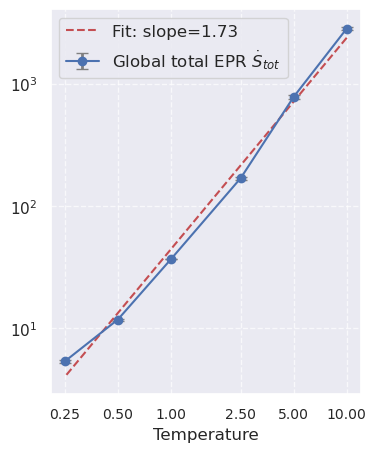

In [5]:

key_order=["F1_62_T10","F1_62_T5", "F1_62_T2_25", "F1_62_T1", "F1_62_T0_5", "F1_62_T0_25"]
ep_array = np.array([data_dict_T_1_62[key] for key in key_order])
ep_key_list = list(data_dict_T_1_62.keys())

scale_list=[10., 5.,2.5,1.,0.5,0.25]

ep_mean = ep_array.mean(axis=1)
max_value = ep_array.max(axis=1)
min_value = ep_array.min(axis=1)
yerr = np.vstack((ep_mean - min_value, max_value - ep_mean))

plt.figure(figsize=(4,5))
# plt.plot(scale_list, ep_mean, marker='o', linestyle='-', color='b', label='Entropy Production Rate')
plt.errorbar(scale_list, ep_mean, yerr=yerr, fmt='o-', color='b', ecolor='gray', elinewidth=2, capsize=4, label=r'Global total EPR $\dot{S}_{tot}$')
#
# 线性拟合
log_scale_list = np.log10(np.array(scale_list))
log_ep_mean = np.log10(ep_mean)
coefficients = np.polyfit(log_scale_list, log_ep_mean, 1)
slope, intercept = coefficients
fit_line = 10**(slope * np.log10(np.array(scale_list)) + intercept)

plt.plot(scale_list, fit_line, linestyle='--', color='r', label=f'Fit: slope={slope:.2f}') 


plt.xscale('log')
plt.yscale('log')

# 设置横轴刻度标签
plt.xticks(scale_list, [f'{x:.2f}' for x in scale_list], fontsize=10)

# 添加标题和标签 
plt.xlabel('Temperature', fontsize=12)

# 添加网格和图例
plt.grid(True, linestyle='--', alpha=0.7) 
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]  # 调整顺序，0 表示 'Entropy Production Rate'，1 表示 'Fit'
plt.legend(fontsize=12)
plt.savefig("Figure/entropy_production_rate_vs_Temperature_F1_62.pdf", dpi=300, bbox_inches='tight')
